# Chapter 2 - Mobject Basics
**Latest update : 16.6.2021**  
After reading this chapter, you will be able to build up Mobjects on scenes, no animations included yet. There will be lots of minimal examples and only very brief explanations.

In [1]:
from manim import * 

Manim Community v0.7.0

In [2]:
#ignore this cell, only for setup
params = "-v WARNING -r 500,100 -s  --disable_caching Example"
paramsbigger = "-v WARNING -r 500,120 -s  --disable_caching Example"

## Positioning
First we want to position mobjects.
There are tons of options, and not everything will be covered here.

### set positions
Some important methods to set positions are:  
`shift` `move_to`  `align_to` , `next_to` ,`to_corner` , `to_edge` , `arrange` , `arrange_in_grid` 

In [3]:
dORIGIN= Dot(color= BLUE,radius=0.5)

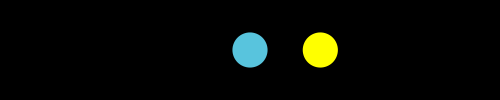

In [4]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW, radius=0.5)
        d.shift(2*RIGHT)
        self.add(dORIGIN, d)

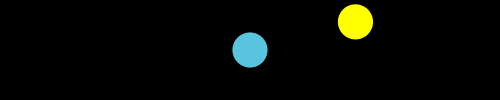

In [5]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW, radius=0.5)
        d.shift(3*RIGHT+0.8*UP)
        self.add(dORIGIN, d)

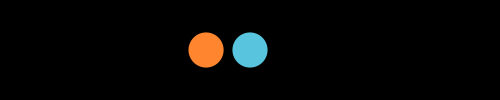

In [6]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.next_to(dORIGIN, LEFT)
        self.add(dORIGIN, d)

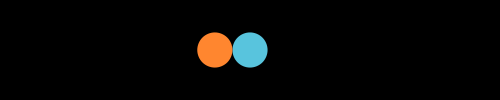

In [7]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.next_to(dORIGIN, LEFT, buff=0)
        self.add(dORIGIN, d)

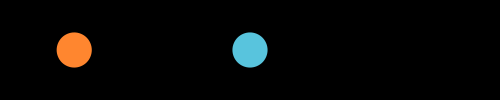

In [8]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.next_to(dORIGIN, LEFT, buff=4)
        self.add(dORIGIN, d)

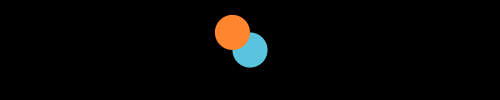

In [9]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.next_to(dORIGIN, UL,buff=-0.5) # UL is UPLEFT 
        self.add(dORIGIN, d)

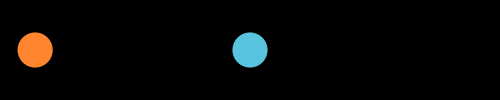

In [10]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.to_edge(LEFT)
        self.add(dORIGIN, d)

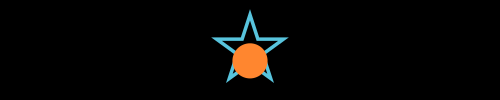

In [11]:
%%manim $params
class Example(Scene):
    def construct(self):
        s= Star(stroke_width=10)
        d=Dot(color= ORANGE, radius=0.5)
        d.align_to(s,DOWN)
        self.add(s,d)

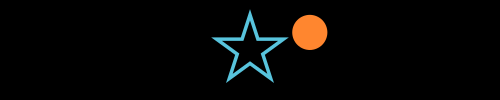

In [12]:
%%manim $params
class Example(Scene):
    def construct(self):
        s= Star(stroke_width=10)
        d=Dot(color= ORANGE, radius=0.5)
        d.next_to(s,RIGHT, aligned_edge=UP) #next to and align combined
        self.add(s,d)


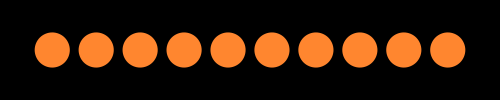

In [13]:
%%manim $params
class Example(Scene):
    def construct(self):
        for i in range(0,10):
            self.add(Dot(color= ORANGE, radius=0.5))
        VGroup(*self.mobjects).arrange()

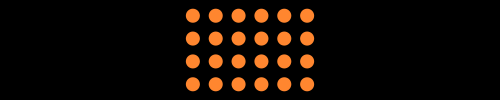

In [14]:
%%manim $params
class Example(Scene):
    def construct(self):
        for i in range(0,24):
            self.add(Dot(color= ORANGE, radius=0.2))
        VGroup(*self.mobjects).arrange_in_grid(cols=6)

### get positions
The most important methods to get positions:  
`get_center` , `get_top` , `get_right` , `get_start`

In [15]:
s= Star(stroke_width=10)
d=Dot(color= YELLOW, radius=0.2)

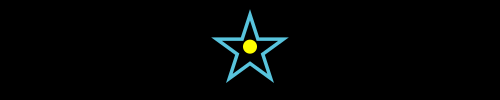

In [16]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= s.get_center()
        self.add(s, d.move_to(pos))

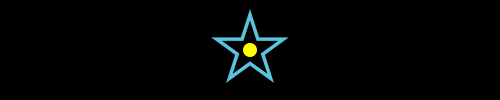

In [17]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= s.get_center_of_mass()
        self.add(s, d.move_to(pos))

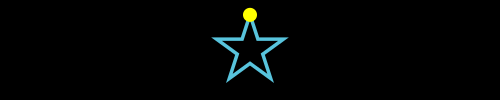

In [18]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= s.get_top()
        self.add(s, d.move_to(pos))

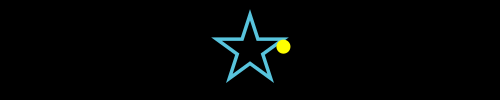

In [19]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= s.get_right()
        self.add(s, d.move_to(pos))

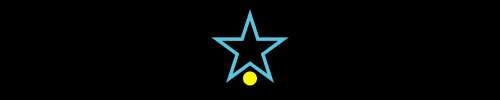

In [20]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= s.get_bottom()
        self.add(s, d.move_to(pos))

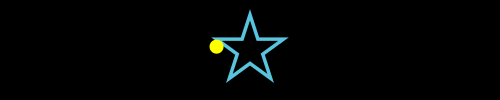

In [21]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= s.get_left()
        self.add(s, d.move_to(pos))

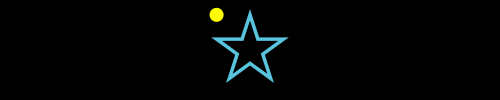

In [22]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= s.get_corner(UL)
        self.add(s, d.move_to(pos))

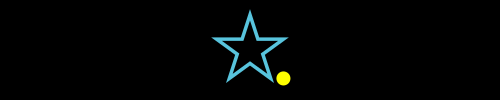

In [23]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= s.get_corner(DR)
        self.add(s, d.move_to(pos))

In [24]:
arc= Arc(radius=1.0, start_angle=-PI/16, angle=PI, stroke_width=10)

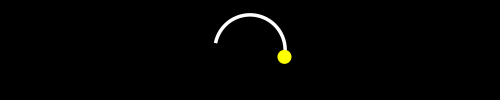

In [25]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= arc.get_start()
        self.add(arc, d.move_to(pos))

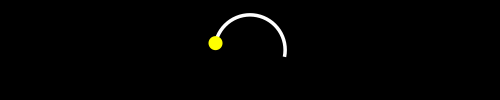

In [26]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= arc.get_end()
        self.add(arc, d.move_to(pos))

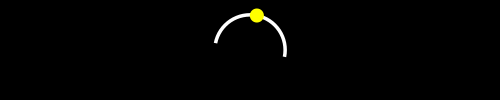

In [27]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= arc.get_midpoint()
        self.add(arc, d.move_to(pos))

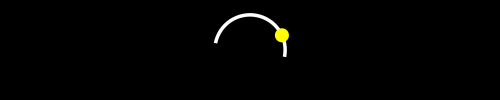

In [28]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= arc.point_from_proportion(0.2)
        self.add(arc, d.move_to(pos))

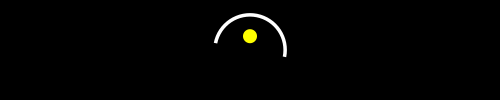

In [29]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= arc.get_center()
        self.add(arc, d.move_to(pos))

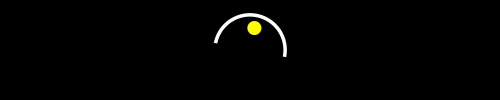

In [30]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= arc.get_center_of_mass()
        self.add(arc, d.move_to(pos))

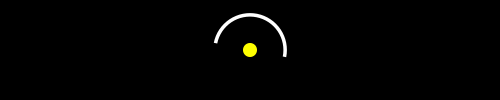

In [31]:
%%manim $params
class Example(Scene):
    def construct(self):
        pos= arc.get_arc_center()
        self.add(arc, d.move_to(pos))

3.0


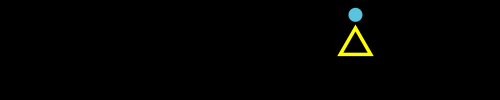

In [32]:
%%manim $params
class Example(Scene): #Example for `get_x` , `get_y`, `set_x` and `set_y`
    def construct(self):
        d = Dot(point=[3,1,0],radius=0.2,color= BLUE)
        triangle= Triangle(color=YELLOW, stroke_width=10).scale(0.5)
        x_pos=d.get_x() 
        print(x_pos)
        triangle.set_x(x_pos)
        self.add(d, triangle)

1.0


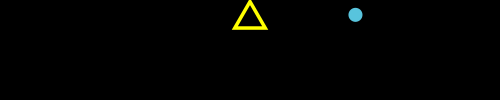

In [33]:
%%manim $params
class Example(Scene): #Example for `get_x` , `get_y`, `set_x` and `set_y`
    def construct(self):
        d = Dot(point=[3,1,0],radius=0.2,color= BLUE)
        triangle= Triangle(color=YELLOW, stroke_width=10).scale(0.5)
        y_pos=d.get_y() 
        print(y_pos)
        triangle.set_y(y_pos)
        self.add(d, triangle)

## Scaling and Stretching

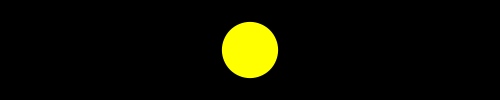

In [34]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW)
        d.scale(10)
        self.add(d)

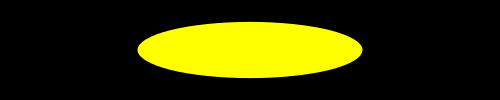

In [35]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW)
        d.scale(10)
        d.stretch_in_place(4, dim = 0) # dim = 0 means vertical
        self.add(d)

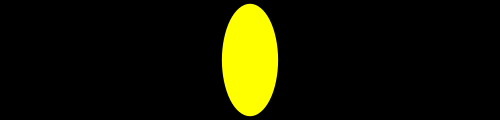

In [36]:
%%manim $paramsbigger
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW)
        d.scale(10)
        d.stretch_in_place(2, dim = 1) # dim = 1 means horizontal
        self.add(d)

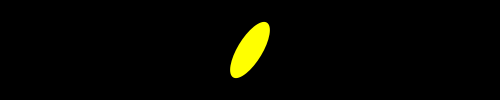

In [37]:
%%manim $params
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW)
        d.scale(10)
        d.apply_matrix([[0.5, 0.5, 0], # shear matrix
                        [ 0 ,  1 , 0],
                        [ 0 ,  0 , 1]])
        self.add(d)

## Rotating

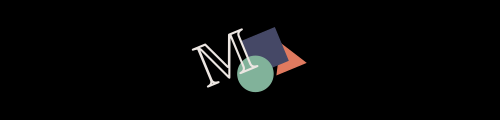

In [38]:
%%manim $paramsbigger
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        m.rotate(PI/8)
        self.add(m)

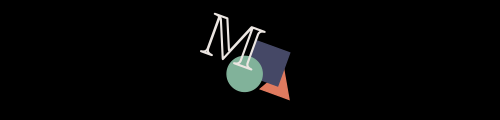

In [39]:
%%manim $paramsbigger
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        m.rotate(-20*DEGREES)
        self.add(m)

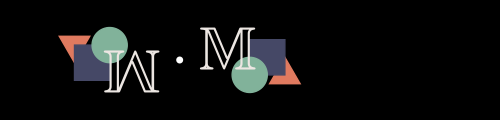

In [40]:
%%manim $paramsbigger
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        self.add(m.copy())
        m.rotate(about_point=2*LEFT, angle=180*DEGREES)
        self.add(m, Dot(2*LEFT,radius=0.1))

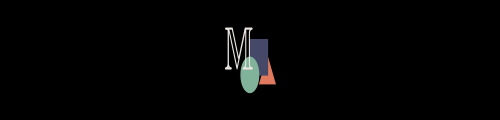

In [41]:
%%manim $paramsbigger
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        m.rotate(axis=UP,angle=60*DEGREES)
        self.add(m)

------------
------------

<div class="alert alert-info">

Note

Python is very fertile tool, there multiple ways to accomplish a certain task, but some options are not "best practice". 
For the methods in the next chapters, I want to show the best practice (labeled with **BEST** and the **green check with the star**), other possible options (labeled with **YES** and the **green check**), and options that do not work (labeled with **NO** and the **red cross**)

</div>

In [42]:
# ignore this cell, only for setup
YES = SVGMobject("good.svg").to_edge(LEFT, buff=1)
BEST = YES.copy()
BEST.add(Star(color= YELLOW, fill_opacity=1).scale(0.5).move_to(BEST).shift(0.5*DOWN+0.5*RIGHT))
NO  = Cross(Square(), stroke_color = RED_D, stroke_width = 38).scale(0.9).move_to(YES)

## Colors and Opacity  

* Color parameters for Mobjects are `stroke_color`, `fill_color` and `color`.   The parameter  `color` automatically sets both `stroke_color` and `fill_color`.  
The recommended ways to set **colors** are via  `c = Circle(fill_color= BLUE, fill_opacity= 1 )` , `c.set_fill(color=RED)` or `c.set_style(fill_color=GREEN)`  
Not possible are `c.fill_color=YELLOW` ,   `c.set(fill_color=YELLOW)` and `c.set_fill_color(YELLOW)`  


* Opacity parameters for Mobjects are `fill_opacity` and `stroke_opacity` (there is **not**  `opacity` here).  
The recommended ways to set **opacity** are via  `c = Circle(fill_color= BLUE, fill_opacity= 0.5 )` , `c.set_fill(color=RED)` or `c.set_style(fill_color=GREEN)`  
Analog to colors, `c.fill_opacity=1`, `c.set(fill_opacity=1)` and `c.set_fill_opacity(1)` are not possible. (to keep things short, these examples are not shown).  


### Colors

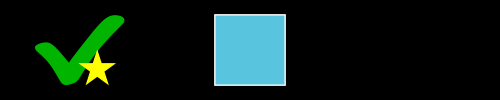

In [43]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Square(fill_color= BLUE, fill_opacity= 1 )
        self.add(BEST,c)

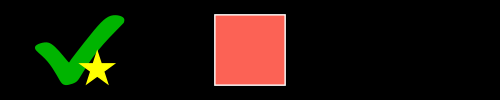

In [44]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Square(fill_color= BLUE, fill_opacity= 1)
        c.set_fill(color=RED)
        self.add(BEST,c)

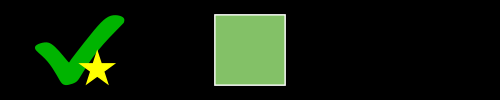

In [45]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Square(fill_color= BLUE, fill_opacity= 1)
        c.set_style(fill_color=GREEN)
        self.add(BEST,c)

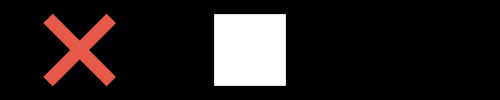

In [46]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Square(fill_opacity= 1)
        c.fill_color=YELLOW
        self.add(NO,c)

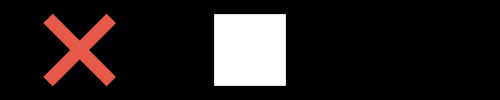

In [47]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Square(fill_opacity= 1)
        c.set(fill_color=YELLOW)
        self.add(NO,c)

<string>:4: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


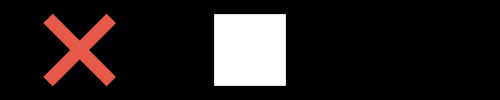

In [48]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Square(fill_opacity= 1)
        c.set_fill_color(YELLOW)
        self.add(NO,c)

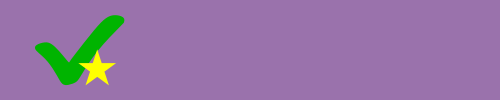

In [49]:
%%manim $params
class Example(Scene):
    def construct(self):
        self.camera.background_color = PURPLE
        self.add(BEST)

### Opacitiy

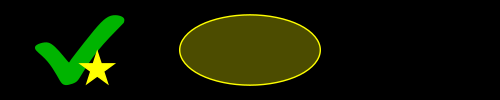

In [50]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Ellipse(color= YELLOW, fill_opacity=0.3).scale(2)
        self.add(BEST,c)

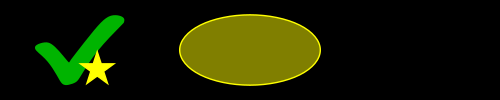

In [51]:
%%manim  $params
class Example(Scene):
    def construct(self):
        c = Ellipse(color= YELLOW).scale(2)
        c.set_fill(opacity=0.5) # be careful: here, it must be `opacity` and not `fill_opacity` !
        self.add(BEST,c)

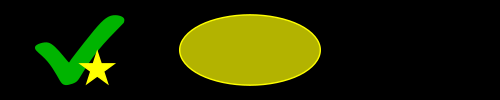

In [52]:
%%manim  $params
class Example(Scene):
    def construct(self):
        c = Ellipse(color= YELLOW).scale(2)
        c.set_style(fill_opacity=0.7) # and here, it must be `fill_opacity` and not `opacity` !
        self.add(BEST,c)

## Stroke width

Strokes can be set in multiple ways:   
The recommended ways are via  `Circle(stroke_width=30)` , `c.set_stroke(width = 30)` or `c.set_style(stroke_width= 30)`    
Also possible, but not the best solution is `c.stroke_width = 30` and `c.set(stroke_width = 30)`   
Also possible, but not recommended because deprecated is `c.set_stroke_width(30)`   

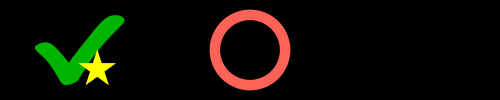

In [53]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Circle(stroke_width=30)
        self.add(BEST,c)

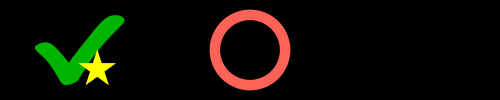

In [54]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Circle()
        c.set_stroke(width = 30)
        self.add(BEST,c)

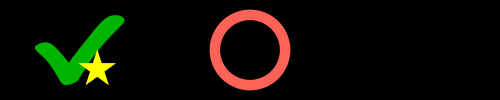

In [55]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Circle()
        c.set_style(stroke_width= 30)
        self.add(BEST,c)

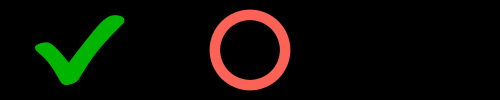

In [56]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Circle()
        c.stroke_width = 30
        self.add(YES,c)

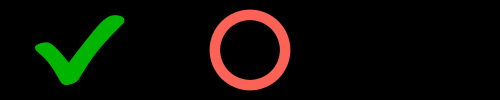

In [57]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Circle()
        c.set(stroke_width = 30)
        self.add(YES,c)

<string>:4: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


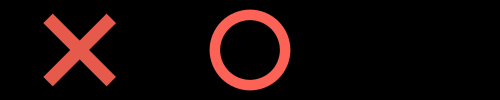

In [58]:
%%manim $params
class Example(Scene):
    def construct(self):
        c = Circle()
        c.set_stroke_width(30)
        self.add(NO,c)

## Layers
There are two main ways to change the layers of Mobjects:    

   1. Reordering the list of submobjects that where added  
   2. Using the z_index  

### submobjects
A scene stores displayed mobjects in a list. They are displayed in the order that they are added to the scene with the syntax `self.add(circleLeft,circleRight)`
First, we have a look on positioning mobjects with `self.add` and the methods `self.bring_to_back` and `self.bring_to_front`. In most cases, this is completely enough. Later, we will come to the z_index, that is seen by manim by one priority higher: Even when a mobject is added first to the mobject list, it will be displayed on top of the others, if it has a higher z_index. An example about this will be seen later.

In [59]:
circleLeft = Circle(color=BLUE, fill_opacity=1)
circleRight = Circle(color=ORANGE,fill_opacity=1).shift(RIGHT)
line = Line(2*LEFT,3*RIGHT,color=YELLOW, stroke_width=20)

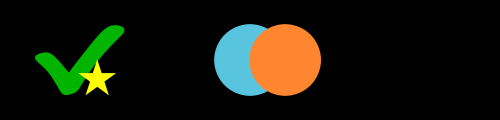

In [60]:
%%manim  $paramsbigger
class Example(Scene):
    def construct(self):
        self.add(circleLeft,circleRight)
        self.add(BEST)

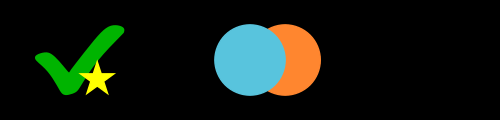

In [61]:
%%manim  $paramsbigger
class Example(Scene):
    def construct(self):
        self.add(circleRight,circleLeft)
        self.add(BEST)

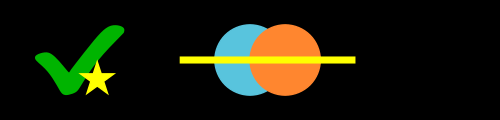

In [62]:
%%manim  $paramsbigger
class Example(Scene):
    def construct(self):
        self.add(circleLeft,circleRight, line)
        self.add(BEST)

[Circle, Circle, Line]
[Line, Circle, Circle]


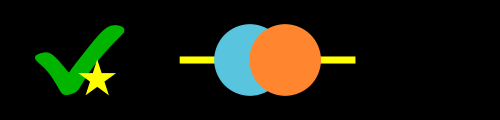

In [63]:
%%manim  $paramsbigger
class Example(Scene):
    def construct(self):
        self.add(circleLeft,circleRight, line)
        print(self.mobjects)
        self.bring_to_back(line)
        print(self.mobjects)
        self.add(BEST)

[Circle, Circle, Line]
[Circle, Line, Circle]


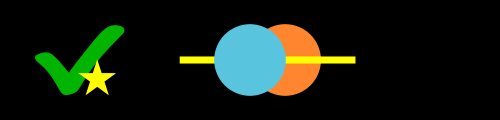

In [64]:
%%manim  $paramsbigger
class Example(Scene):
    def construct(self):
        self.add(circleLeft,circleRight, line)
        print(self.mobjects)
        self.bring_to_front(circleLeft)
        print(self.mobjects)
        self.add(BEST)

### z_index
The default z_index is 0. 
Now we will see what happens, when we increase the value of the z_index.   
The z_index can be changed by `triangle = Triangle(z_index=1)`,`triangle.z_index=1` , `triangle.set(z_index=1)` and `triangle.set_z_index(1)`  
It can not be changed using `triangle.set_style(z_index=1)`

In [65]:
#initilizing line,circle,square and triangle
BUFF= 0.5*DOWN 
line = Line(3*LEFT,3*RIGHT,color=YELLOW, stroke_width=20)
circle = Circle(color=GREEN_D, fill_opacity=1).shift(LEFT+BUFF)
square = Square(color=BLUE_D, fill_opacity=1).shift(UP+BUFF)
triangle = Triangle(color=RED_D, fill_opacity=1).shift(RIGHT+BUFF)

[Line, Triangle, Square, Circle]
triangle.z_index=0 , square.z_index=0 , circle.z_index=0 , line.z_index=0


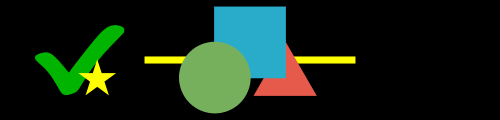

In [66]:
%%manim  $paramsbigger
class Example(Scene):
    def construct(self):
        self.add(line,triangle, square, circle)  # order matters
        print(self.mobjects)
        print(f"{triangle.z_index=} , {square.z_index=} , {circle.z_index=} , {line.z_index=}")
        self.add(BEST)

[Triangle, Square, Circle, Line]
triangle.z_index=1 , square.z_index=0 , circle.z_index=0 , line.z_index=0


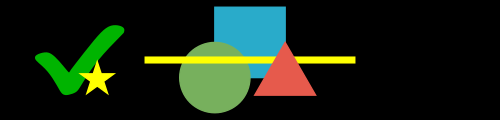

In [67]:
%%manim  $paramsbigger
class Example(Scene):
    def construct(self):
        triangle.z_index=1
        self.add(triangle, square, circle,line)  # order matters
        print(self.mobjects)
        print(f"{triangle.z_index=} , {square.z_index=} , {circle.z_index=} , {line.z_index=}")
        self.add(BEST)

line.z_index=0


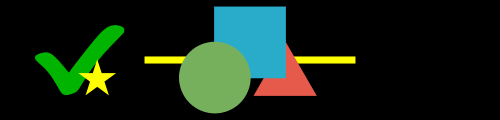

In [68]:
%%manim  $paramsbigger
class Example(Scene):
    def construct(self):
        triangle.z_index = 1
        square.z_index   = 2
        circle.z_index   = 3
        self.add(triangle, square, circle,line)  # order matters
        self.add(BEST)
        print(f"{line.z_index=}")

line.z_index=0


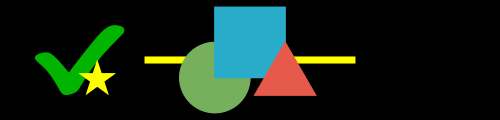

In [69]:
%%manim  $paramsbigger
class Example(Scene):
    def construct(self):
        triangle.z_index = 3
        square.z_index   = 2
        circle.z_index   = 1
        self.add(triangle, square, circle,line)  # order matters
        self.add(BEST)
        print(f"{line.z_index=}")

[Triangle, Square, Circle, Line]
triangle.z_index=1 , square.z_index=0 , circle.z_index=0 , line.z_index=0


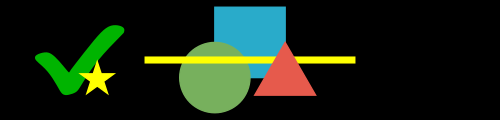

In [70]:
%%manim  $paramsbigger
triangle.z_index = 0
square.z_index   = 0
circle.z_index   = 0
class Example(Scene):
    def construct(self):
        triangle.set(z_index=1)
        self.add(triangle, square, circle,line)  # order matters
        print(self.mobjects)
        print(f"{triangle.z_index=} , {square.z_index=} , {circle.z_index=} , {line.z_index=}")
        self.add(BEST)

TypeError, set_style() got an unexpected keyword argument 'z_index'. 
triangle.z_index=0 , square.z_index=0 , circle.z_index=0 , line.z_index=0


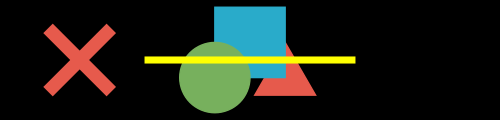

In [71]:
%%manim  $paramsbigger 
triangle.z_index = 0
square.z_index   = 0
circle.z_index   = 0
class Example(Scene):
    def construct(self):
        try: 
            triangle.set_style(z_index=1)  # here we expect an error! Only for didactic purpose, it is put into this `try` blog, so that no long error message is shown.
        except TypeError:  
            print("TypeError, set_style() got an unexpected keyword argument 'z_index'. ")
            self.add(NO)
        self.add(triangle, square, circle,line)  # order matters
        print(f"{triangle.z_index=} , {square.z_index=} , {circle.z_index=} , {line.z_index=}")


##  VGroup and Group
### VGroup
It is a Group of VMobjects ("V" stands for Vector)

In [72]:
#only for setup
def create_dots():
    blue1_ref= Dot(color= BLUE,       point=[-.3,-.5,0], radius=0.5)
    blue2_ref= Dot(color= BLUE_A,     point=[ .3,-.5,0], radius=0.5)
    yellow1_ref= Dot(color= YELLOW,   point=[-.3, .5,0], radius=0.5)
    yellow2_ref= Dot(color= YELLOW_A, point=[ .3, .5,0], radius=0.5)
    return blue1_ref, blue2_ref,yellow1_ref,yellow2_ref

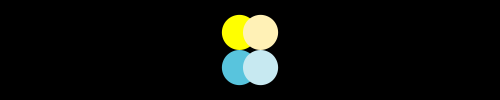

In [73]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        self.add(blue1,blue2, yellow1,yellow2)

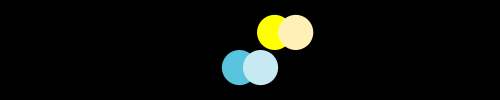

In [74]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        VGroup(yellow1,yellow2).shift(RIGHT)
        self.add(blue1,blue2, yellow1,yellow2)

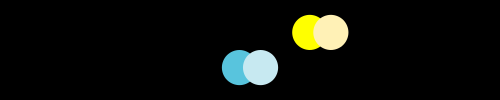

In [75]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        g1=VGroup(yellow1,yellow2).shift(2*RIGHT)
        self.add(blue1,blue2, g1)

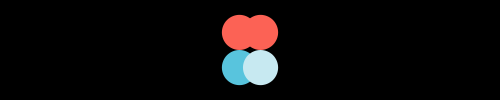

In [76]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        g1=VGroup(yellow1,yellow2).set_color(RED)
        self.add(blue1,blue2, g1)

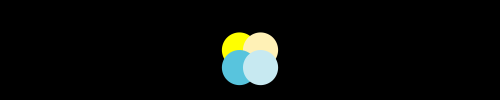

In [77]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        g1=VGroup(yellow1,yellow2).shift(0.5*DOWN)
        g2=VGroup(blue1,blue2)
        self.add(g1, g2)

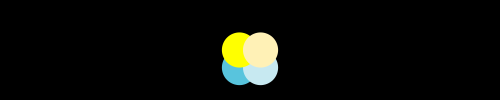

In [78]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        g1=VGroup(yellow1,yellow2).shift(0.5*DOWN)
        g2=VGroup(blue1,blue2)
        self.add(g2,g1)

[VGroup(Dot, Dot), VGroup(Dot, Dot)]
[Dot, Dot]
[Dot, Dot]


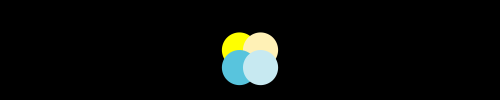

In [79]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): # Groups of Groups
    def construct(self):
        g1=VGroup(yellow1,yellow2).shift(0.5*DOWN)
        g2=VGroup(blue1,blue2)
        gAll = VGroup(g1, g2)
        self.add(gAll)
        print(gAll.submobjects)
        print(gAll.submobjects[0].submobjects)
        print(gAll.submobjects[1].submobjects)

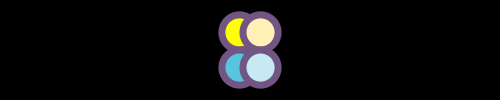

In [80]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): #setting VMobject attibutes
    def construct(self):
        g=VGroup(yellow1,yellow2,blue1,blue2)
        g.set_stroke(color=PURPLE_D, width=20) # <--
        self.add(g)

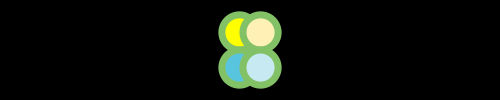

In [81]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): # add syntax
    def construct(self):
        g=VGroup(yellow1,yellow2,blue1)
        g.add(blue2) # <--
        g.set_stroke(color=GREEN, width=20)
        self.add(g)

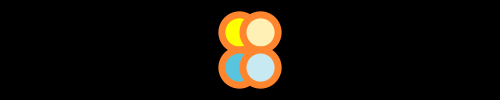

In [82]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): # += Syntax
    def construct(self):
        g=VGroup(yellow1,yellow2,blue1)
        g += blue2 # <--
        g.set_stroke(color=ORANGE, width=20)
        self.add(g)

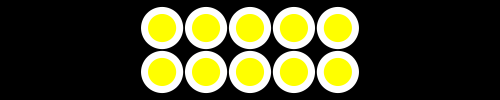

In [83]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): # empty initilizing
    def construct(self):
        g=VGroup()
        for _ in range(0,10):
            g += yellow1.copy()
        g.set_stroke(color=WHITE, width=20)
        g.arrange_in_grid(rows=2) # <-- Groups and VGroups can be arranged in grids
        g.move_to(ORIGIN)
        self.add(g)

<div class="alert alert-info">

Note: VMobject().add(...) is functionally equivalent to VGroup(...), but it is recommended to use VGroup, as 
    
* It is better readable 
* supports the `+=` syntax
    
</div>

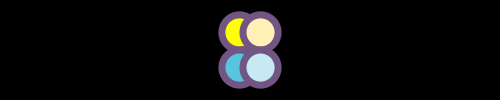

In [108]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):  # using VMobject instead
    def construct(self):
        g= VMobject()
        g.add(yellow1,yellow2,blue1,blue2)
        g.set_stroke(color=PURPLE_D, width=20)
        self.add(g)

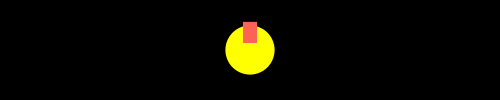

In [109]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):  # other Mobjects can be added to any Mobjects
    def construct(self):
        d= Dot(color= YELLOW, radius=0.7)
        d.add(Line(0.2*UP, 0.8*UP, color=RED,stroke_width=40))
        self.add(d)

Adding an Mobject to a VGroup is not possible!


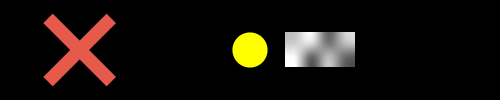

In [110]:
%%manim $params
dot= Dot(color= YELLOW, radius=0.5)
image = ImageMobject(np.uint8([[200, 233, 111, 200],
                               [255, 100, 190, 100]])).shift(2*RIGHT)
image.height = 1
class Example(Scene): 
    def construct(self):
        self.add(dot, image)
        try: # Image is not a VMobject!
            VGroup(dot,image).shift(3*RIGHT)
        except TypeError:
            print("Adding an Mobject to a VGroup is not possible!")
            self.add(NO)

### Group
Groups Mobjects and VMobjects togehter.
You can only use the methods of Mobject here.
Methods of VMobject wont be supported.

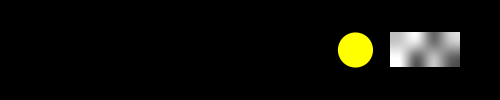

In [111]:
%%manim $params
dot= Dot(color= YELLOW, radius=0.5)
image = ImageMobject(np.uint8([[200, 233, 111, 200],
                               [255, 100, 190, 100]])).shift(2*RIGHT)
image.height = 1
class Example(Scene): 
    def construct(self):
        self.add(dot, image)
        Group(dot,image).shift(3*RIGHT)

TypeError!


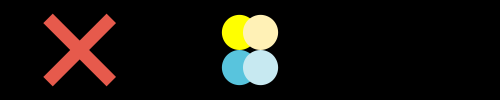

In [112]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): # 
    def construct(self):
        g=Group(yellow1,yellow2,blue1,blue2)
        try:
            g.set_stroke(color=PURPLE_D, width=20)
        except TypeError:
            print("TypeError!")
            self.add(NO)
        self.add(g)

<div class="alert alert-info">

Note: `z_index` is not supported, neither for VGroup nor for Group
    
</div>

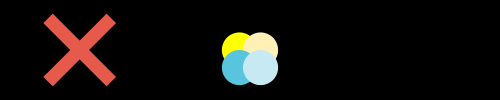

In [113]:
%%manim $params
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        a=VGroup(yellow1,yellow2).shift(0.5*DOWN)
        b=VGroup(blue1,blue2)
        a.set_z_index(2)
        b.set_z_index(1)
        self.add(a,b)
        self.add(NO)

<div class="alert alert-info">

Congratulations!

You are now a master in setting up your Mobjects on a scene. Let's go on with the part you came to manim for in the first place: Animations!

</div>